In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [10]:
# Create plots directory if it does not exist
os.makedirs("../results/plots", exist_ok=True)


In [12]:
# Load dataset with correct encoding and relative path
df = pd.read_csv(
    "../data/raw/IMDb Movies India.csv",
    encoding="latin1"
)

df.head(7920)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
7915,Kundan,(1993),137 min,"Action, Drama",5.8,40,K.C. Bokadia,Dharmendra,Jaya Prada,Amrish Puri
7916,Kundan,(2004),NaN,Action,NaN,NaN,Samir,Dharmendra,Shakti Kapoor,Satnam Kaur
7917,Kunwar Sahab,(2016),83 min,Family,NaN,NaN,Uttar Kumar,Uttar Kumar,Kanika Raheja,NaN
7918,Kunwara,(2000),134 min,"Comedy, Drama, Romance",5.1,887,David Dhawan,Govinda,Urmila Matondkar,Nagma


In [13]:
df.shape
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

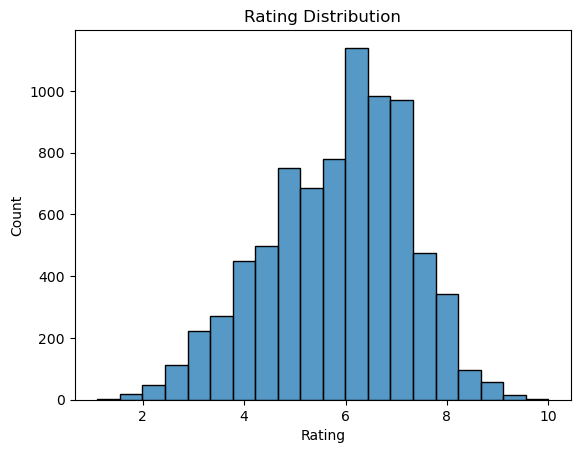

In [15]:
plt.figure()
sns.histplot(df['Rating'].dropna(), bins=20)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("../results/plots/rating_distribution.png")
plt.show()


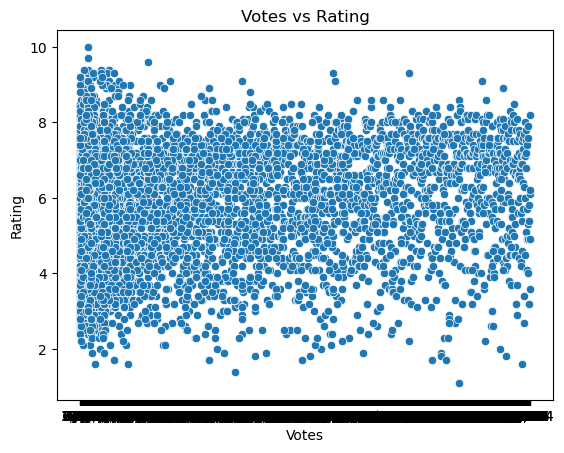

In [17]:
plt.figure()
sns.scatterplot(x=df['Votes'], y=df['Rating'])
plt.title("Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.savefig("../results/plots/votes_vs_rating.png")
plt.show()


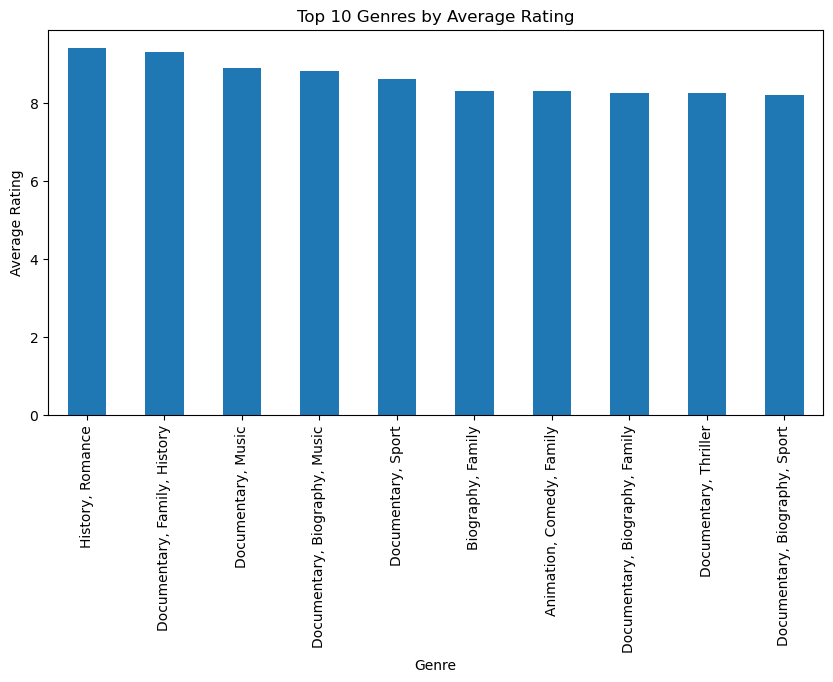

In [18]:
genre_rating = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
genre_rating.plot(kind='bar')
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.savefig("../results/plots/genre_vs_rating.png")
plt.show()


In [24]:
# Temporary numeric cleaning for EDA (do not overwrite raw data)
eda_df = df.copy()

# Clean Votes column
eda_df['Votes'] = eda_df['Votes'].astype(str).str.replace(',', '', regex=False)
eda_df['Votes'] = pd.to_numeric(eda_df['Votes'], errors='coerce')

# Clean Year column
eda_df['Year'] = eda_df['Year'].astype(str).str.extract('(\d{4})')
eda_df['Year'] = pd.to_numeric(eda_df['Year'], errors='coerce')

# Clean Duration column
eda_df['Duration'] = eda_df['Duration'].astype(str).str.extract('(\d+)')
eda_df['Duration'] = pd.to_numeric(eda_df['Duration'], errors='coerce')


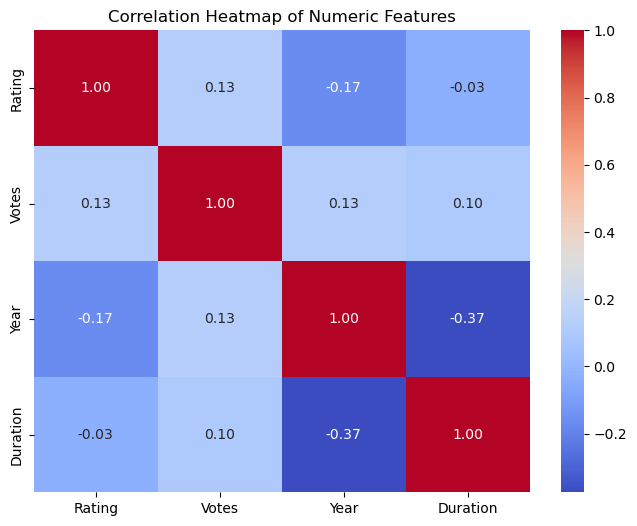

In [27]:
numeric_cols = ['Rating', 'Votes', 'Year', 'Duration']
numeric_df = eda_df[numeric_cols]

plt.figure(figsize=(8,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("../results/plots/correlation_heatmap.png")
plt.show()
